In [1]:
import os, cv2, re, random
import numpy as np
import pandas as pd
import json
from pprint import pprint
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
# from keras import layers, models, optimizers
# from keras import backend as K

In [3]:
ann_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/"
img_DIR=r"C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/"

In [4]:
img=[img_DIR+i for i in os.listdir(img_DIR)] 
ann=[ann_DIR+i for i in os.listdir(ann_DIR)] 

In [5]:
img[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13.png'

In [6]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [7]:
def draw_contour(img,file):  
    with open(file) as f:
        data = json.load(f)
    ext=data['objects'][0]['points']['exterior'][0]
    xt=data['objects'][0]['points']['exterior'][0][0]
    yt=data['objects'][0]['points']['exterior'][0][1]
    xl=data['objects'][0]['points']['exterior'][1][0]
    yl=data['objects'][0]['points']['exterior'][1][1]
    im = np.array(Image.open(img), dtype=np.uint8)

    # Create figure and axes

    fig,ax = plt.subplots(1)

    height=abs(yt-yl)
    width=abs(xt-xl)
    
    # Display the image
    ax.imshow(im,cmap='gray')

    # Create a Rectangle patch
    rect = patches.Rectangle(ext,width,height,linewidth=1,edgecolor='r',facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

    return plt.show()

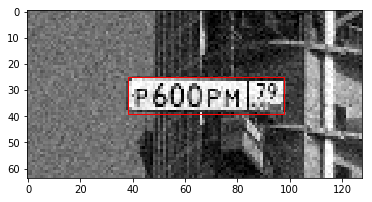

In [8]:
draw_contour(img[10],ann[10])

In [9]:
# def split_dataset(ann):
# for jsonfile in glob.iglob(os.path.join(src_dir, "*.json")):
#     with open(jsonfile) as f:
#         data = json.load(f)
#     if 'train' in  data['tags']:    
#         shutil.copy(jsonfile, train_dst_dir)
#     else:
#         shutil.copy(jsonfile, valid_dst_dir)

In [10]:
with open(ann[0]) as f:
    data = json.load(f)
pprint(data)

{'description': '',
 'objects': [{'bitmap': {'np': [], 'origin': []},
              'classTitle': 'plate_bbox',
              'description': '',
              'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]],
                         'interior': []},
              'tags': [],
              'type': 'rectangle'}],
 'size': {'height': 64, 'width': 128},
 'tags': ['train']}


In [11]:
# import shutil #to copy ann  from one path to another
# import glob
# import os
# src_dir = r"C:\Users\Vision\Downloads\artificial_samples\License plates__artificial\ann"
# train_dst_dir = r"C:\Users\Vision\Downloads\artificial_samples\split\train\ann"
# valid_dst_dir = r"C:\Users\Vision\Downloads\artificial_samples\split\valid\ann"

# for jsonfile in glob.iglob(os.path.join(src_dir, "*.json")):
#     with open(jsonfile) as f:
#         data = json.load(f)
#     if 'train' in  data['tags']:    
#         shutil.copy(jsonfile, train_dst_dir)
#     else:
#         shutil.copy(jsonfile, valid_dst_dir)

In [12]:
# #good old normal split
image_fps_list = list(img)
random.seed(42)
random.shuffle(image_fps_list)
val_size = 1500
image_fps_val = image_fps_list[:val_size]
image_fps_train = image_fps_list[val_size:]

In [13]:
ann_fps_list = list(ann)
random.seed(42)
random.shuffle(ann_fps_list)
val_size = 1500
ann_fps_val = ann_fps_list[:val_size]
ann_fps_train = ann_fps_list[val_size:]


In [14]:
# image_fps_train

In [15]:
# ann_fps_train

In [16]:
ann[0]

'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/ann/00000000_E112YB13.json'

In [17]:
# !git clone https://www.github.com/matterport/Mask_RCNN.git
# os.chdir('Mask_RCNN')
# #!python setup.py -q install

In [18]:
pwd

'D:\\PYTHON\\Scripts\\License-Plate-Detection'

In [19]:
# sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
img

['C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000000_E112YB13.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000001_H653OT25.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000002_C725PE08.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000003_M556YE85.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000004_X118MO60.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000005_M812HX81.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000006_C064BE53.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000007_P118HB03.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/00000008_B710XT96.png',
 'C:/Users/Vision/Downloads/artificial_samples/License plates__artificial/img/0000

In [24]:
for i, fp in enumerate(img):
            with open(ann[0]) as f:
                data = json.load(f)
            annotations = data
print(annotations)

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}


In [26]:
for i, fp in enumerate(img):
    with open(ann[i]) as f:
        data = json.load(f)
    annotations = data
    print(annotations)
    

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[26.0, 43.0], [101.0, 61.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[45.0, 28.0], [83.0, 36.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[41.0, 29.0], [87.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[38.0, 25.0], [91.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[38.0, 25.0], [92.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[28.0, 22.0], [100.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[34.0, 20.0], [92.0, 34.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['test'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[43.0, 11.0], [85.0, 21.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 39.0], [88.0, 51.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [],

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[45.0, 27.0], [83.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[40.0, 28.0], [86.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 26.0], [88.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[30.0, 26.0], [103.0, 43.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[35.0, 25.0], [92.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[36.0, 26.0], [92.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[6.0, 23.0], [78.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[35.0, 27.0], [92.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[45.0, 22.0], [117.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[30.0, 26.0], [84.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[26.0, 7.0], [101.0, 25.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[38.0, 26.0], [90.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[30.0, 25.0], [97.0, 43.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[55.0, 0.0], [99.0, 11.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[3.0, 26.0], [61.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[5.0, 27.0], [46.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[44.0, 30.0], [84.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[27.0, 19.0], [98.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [],

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[31.0, 24.0], [97.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[31.0, 23.0], [97.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[21.0, 6.0], [79.0, 19.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [],

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 30.0], [78.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[40.0, 25.0], [80.0, 34.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[32.0, 24.0], [97.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[42.0, 23.0], [110.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[29.0, 17.0], [98.0, 35.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[36.0, 25.0], [91.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[65.0, 27.0], [105.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[30.0, 23.0], [97.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[24.0, 12.0], [71.0, 23.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[35.0, 14.0], [92.0, 29.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[37.0, 26.0], [85.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[28.0, 3.0], [99.0, 22.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [],

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[29.0, 26.0], [95.0, 43.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[20.0, 22.0], [92.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 26.0], [89.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[31.0, 10.0], [97.0, 28.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[44.0, 28.0], [84.0, 36.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[55.0, 27.0], [93.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[16.0, 22.0], [87.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[32.0, 25.0], [96.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[35.0, 26.0], [77.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[57.0, 27.0], [96.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[43.0, 27.0], [85.0, 36.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[54.0, 24.0], [116.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[35.0, 25.0], [93.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[43.0, 48.0], [85.0, 57.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[33.0, 18.0], [104.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[4.0, 6.0], [68.0, 21.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[6.0, 25.0], [64.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[31.0, 23.0], [100.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[45.0, 26.0], [99.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 25.0], [89.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[29.0, 24.0], [101.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[31.0, 24.0], [97.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[26.0, 34.0], [101.0, 53.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[36.0, 29.0], [91.0, 42.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[24.0, 21.0], [100.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[36.0, 26.0], [89.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[43.0, 16.0], [84.0, 26.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[32.0, 14.0], [96.0, 31.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[34.0, 23.0], [94.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[16.0, 23.0], [90.0, 42.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[54.0, 26.0], [100.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[0.0, 24.0], [61.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 32.0], [93.0, 45.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[27.0, 18.0], [101.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[47.0, 27.0], [105.0, 43.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[34.0, 26.0], [95.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': 

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[33.0, 16.0], [94.0, 31.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[32.0, 17.0], [96.0, 34.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[41.0, 25.0], [111.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 26.0], [89.0, 37.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[32.0, 25.0], [96.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[3.0, 26.0], [48.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [],

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[48.0, 23.0], [115.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[31.0, 23.0], [97.0, 40.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[41.0, 26.0], [90.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[43.0, 26.0], [96.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[39.0, 54.0], [81.0, 63.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[49.0, 30.0], [93.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[27.0, 22.0], [101.0, 42.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[42.0, 31.0], [86.0, 41.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[60.0, 25.0], [122.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': 

{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[34.0, 25.0], [94.0, 39.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[11.0, 37.0], [77.0, 54.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': [], 'points': {'exterior': [[35.0, 25.0], [93.0, 38.0]], 'interior': []}}], 'size': {'height': 64, 'width': 128}}
{'tags': ['train'], 'description': '', 'objects': [{'bitmap': {'origin': [], 'np': []}, 'type': 'rectangle', 'classTitle': 'plate_bbox', 'description': '', 'tags': []

KeyboardInterrupt: 

In [22]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('license plate', 1, 'confidence')
        
        # add images 
        for i, fp in enumerate(img):
            with open(ann[i]) as f:
                data = json.load(f)
            annotations = data
            self.add_image('license plate', image_id=i, path=fp, 
                           annotations=annotations, orig_height=128, orig_width=64)
            
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        ds = pydicom.read_file(fp)
        image = ds.pixel_array
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
#                 if a['Target'] == 1:
                x = int(a['x'])
                y = int(a['y'])
                w = int(a['width'])
                h = int(a['height'])
                
                mask_instance = mask[:, :, i].copy()
                cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                mask[:, :, i] = mask_instance
                class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)
    

In [ ]:
    ax.imshow(im,cmap='gray')

    # Create a Rectangle patch
    rect = patches.Rectangle(ext,width,height,linewidth=1,edgecolor='r',facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)

In [ ]:
    ext=data['objects'][0]['points']['exterior'][0]
    xt=data['objects'][0]['points']['exterior'][0][0]
    yt=data['objects'][0]['points']['exterior'][0][1]
    xl=data['objects'][0]['points']['exterior'][1][0]
    yl=data['objects'][0]['points']['exterior'][1][1]

    height=abs(yt-yl)
    width=abs(xt-xl)

In [23]:
dataset_train = DetectorDataset(image_fps_train, ann_fps_train, 128, 64)
dataset_train.prepare()

NameError: name 'image_fps_train' is not defined

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense,Dropout